# **Zomato Restaurant Rating Prediction**

## Overview

Zomato stands out as a top-notch online food delivery application, offering users comprehensive ratings and reviews for restaurants across India. These reviews and ratings play a pivotal role in assessing a restaurant's quality.

To delve into this further, we'll analyze real-time data featuring various factors users typically consider when evaluating a restaurant. Our focus will be on Bangalore City for this examination.

The primary goal is to gain insights from the Zomato dataset, understanding the dynamics influencing the establishment of diverse restaurant types in different areas of Bengaluru. With over 12,000 restaurants serving a global array of dishes, Bengaluru, as a city, continues to witness new restaurant openings regularly. Despite the growing demand, new establishments face challenges competing with well-established counterparts, often offering similar cuisines.

Given Bengaluru's status as India's IT capital, a considerable portion of the population relies on restaurant food due to time constraints. As the restaurant industry experiences ongoing growth, it becomes crucial to examine the local demography. Understanding preferences, such as the popularity of vegetarian food in a specific locality or the presence of particular communities like Jain, Marwaris, and Gujaratis—who predominantly follow a vegetarian diet—can provide valuable insights.

To conduct such analyses, we'll explore data points like:
*   Restaurant location
*   Approximate food prices
*   Presence of theme-based restaurants
*   Localities with the highest number of restaurants serving specific cuisines
*   Identifying the culinary preferences of residents
*   Recognizing neighborhoods renowned for specific types of cuisine.

By studying these factors, we aim to uncover patterns and trends, facilitating a better understanding of the restaurant landscape in Bengaluru.

### Life cycle of Machine learning Project model

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

In [199]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [200]:
#Importing dataset
df = pd.read_csv(r"C:\Users\sahus\Downloads\archive (1)\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [201]:
df.shape

(51717, 17)

In [202]:
# Display summary statistics for a dataframe
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [203]:
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_l

## EXPLORING DATA

In [204]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['votes']

We have 16 categorical features : ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


## Feature Information

* **url**: The URL of the restaurant on the Zomato website.

* **address**: The physical address of the restaurant.

* **name**: The name of the restaurant.

* **online_order**: Indicates whether the restaurant accepts online orders (Yes/No).

* **book_table**: Indicates whether the restaurant allows table booking (Yes/No).

* **rate**: The average rating of the restaurant (in the format "X.X / 5.0").

* **votes**: The number of votes received by the restaurant.

* **phone**: Contact phone number(s) of the restaurant.

* **location**: The area or locality where the restaurant is situated.

* **rest_type**: The type or category of the restaurant (e.g., Casual Dining, Cafe).

* **dish_liked**: Some dishes that are popular or liked at the restaurant.

* **cuisines**: The types of cuisines offered by the restaurant.

* **approx_cost(for two people)**: Approximate cost for two people to dine at the restaurant.

* **reviews_list**: List of reviews and ratings given by customers.

* **menu_item**: Menu items offered by the restaurant.

* **listed_in(type)**: The type of service the restaurant is listed under (e.g., Dine-out).

* **listed_in(city)**: The city or area where the restaurant is listed.

In [205]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

url
https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19                                                                                                                                                                                                                                            0.001934
https://www.zomato.com/bangalore/al-hayath-btm-bangalore?context=eyJzZSI6eyJlIjpbIjUyNTMwIiwiMTg3ODEzNjAiLCIxODc5MTA5MiIsIjE4ODI0MTc0Iiw2MTIxMCwiNTA2NjkiLCIxODY4MDEwNCIsIjE4MTQwNzgwIiwiMTg4NDU0NzYiLCIxODc4NTExMiIsIjE4NjY3NjQ1IiwiMTg3ODExMDUiLCI1NTM3MyIsIjE4NjgwNTAzIiwiMTg0MTc1OTYiXSwidCI6IkRpbmUtT3V0IFJlc3RhdXJhbnRzIGluIEtvcmFtYW5nYWxhIDZ0aCBCbG9jayJ9fQ==                                                                                                               0.001934
https://www.zomato.com/bangalore/donne-bir

# Data Cleaning

In [206]:
# Dropping unnecessary columns
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)


In [207]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [208]:
#Renaming the columns
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})
df.head()

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [209]:
#Dropping duplicate rows
df=df.drop_duplicates()
sum(df.duplicated())

0

In [210]:
#Cleaning individual rows
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
df['Name'] = df['Name'].apply(lambda x: name_clean(x))
df['Name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: Name, Length: 51593, dtype: object

In [211]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see that we have ‘nan,’ ‘NEW,’ and ‘-‘ values that do not have any ratings, and also, the values are strings containing ‘/5’. Let us remove all insignificant data and convert the ratings into numeric values.

In [212]:
## removing 'nan', 'NEW', '-' values
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

## function to remove '/5'
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['Ratings']=df['Ratings'].apply(remove_5)

## converting to float type data

df['Ratings']=df['Ratings'].astype(float)

print(df['Ratings'])

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: Ratings, Length: 51593, dtype: float64


In [213]:
#Noticing the ‘cost’ attribute, we can observe that they are string values containing commas. Below is the code to convert them into numbers.
## function to remove commas and convert the values
## into numbers
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())


0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


## Handling Missing Value

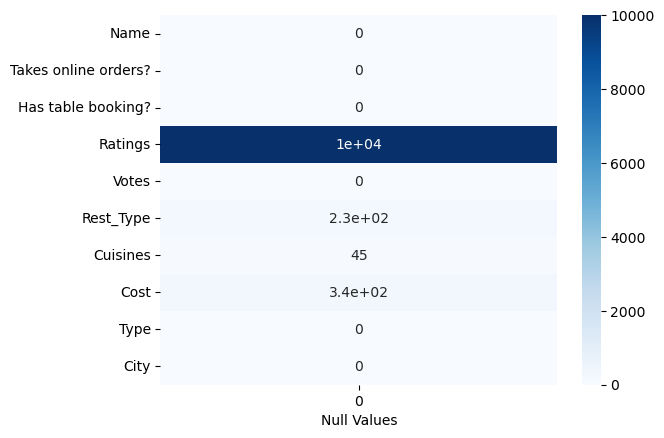

In [214]:
sns.heatmap(df.isnull().sum().values.reshape(-1,1), \
            annot=True, cmap=plt.cm.Blues, yticklabels=df.columns)
plt.xlabel('Null Values')
plt.show()

#### For Ratings Feature

In [215]:
df['Ratings_null']=np.where(df['Ratings'].isnull(),1,0)
# find the percentage of null values
df['Ratings_null'].mean()

0.19388289108987652

##### Ratings have 19% of null value

In [216]:
median=df.Ratings.median()
median

3.7

In [217]:
def impute_nan(df,feature,median):
 df[feature]=df[feature].fillna(median)
impute_nan(df,'Ratings',median)
df.isnull().sum()

Name                      0
Takes online orders?      0
Has table booking?        0
Ratings                   0
Votes                     0
Rest_Type               227
Cuisines                 45
Cost                    344
Type                      0
City                      0
Ratings_null              0
dtype: int64

In [218]:
# Fill missing values in specific columns with their respective strategies
df.fillna({
    'Cost': df['Cost'].mode()[0],
    'Rest_Type': 'Unknown', 
    'Cuisines': 'Unknown',
}, inplace=True)

In [219]:
df.isnull().sum()

Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Votes                   0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
Ratings_null            0
dtype: int64

Looking at the above heatmap, we can see a few missing values, particularly in the ‘Ratings’ column. Seeing that now not a good deal of facts is lacking within the other columns, we can drop the corresponding rows.

In [220]:
df.to_csv('zomato_cleaned.csv', index=False)

## Exploratory Data Analysis

* ### How many restaurants in Bangalore take online orders?

Takes online orders?
Yes    30347
No     21246
Name: count, dtype: int64


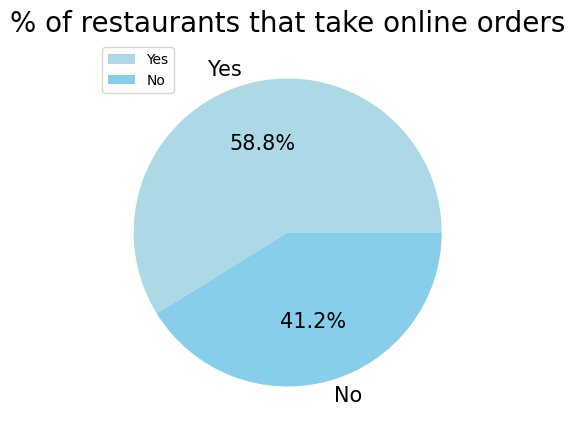

In [221]:
print(df['Takes online orders?'].value_counts())
plt.figure(figsize=(20,5))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 10})

It is evident from the above graph that in nearly 66% of restaurants, an online ordering facility is available

* ### What percentage of restaurants offer table booking facilities?

Has table booking?
No     45177
Yes     6416
Name: count, dtype: int64


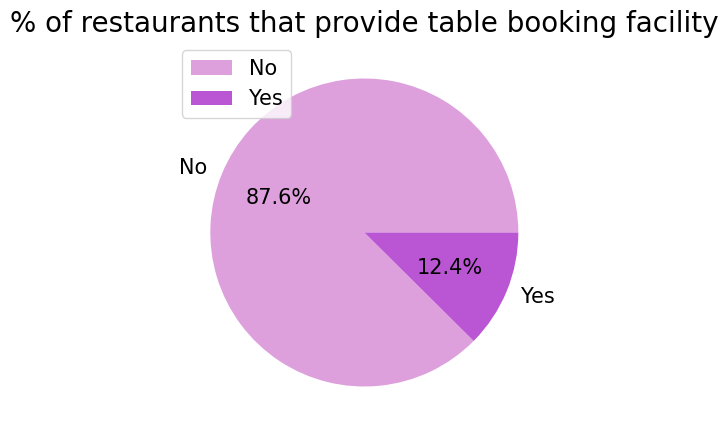

In [222]:
print(df['Has table booking?'].value_counts())
plt.figure(figsize=(20,5))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato.

* ### What was the most common rating?

Text(0, 0.5, 'Ratings Count')

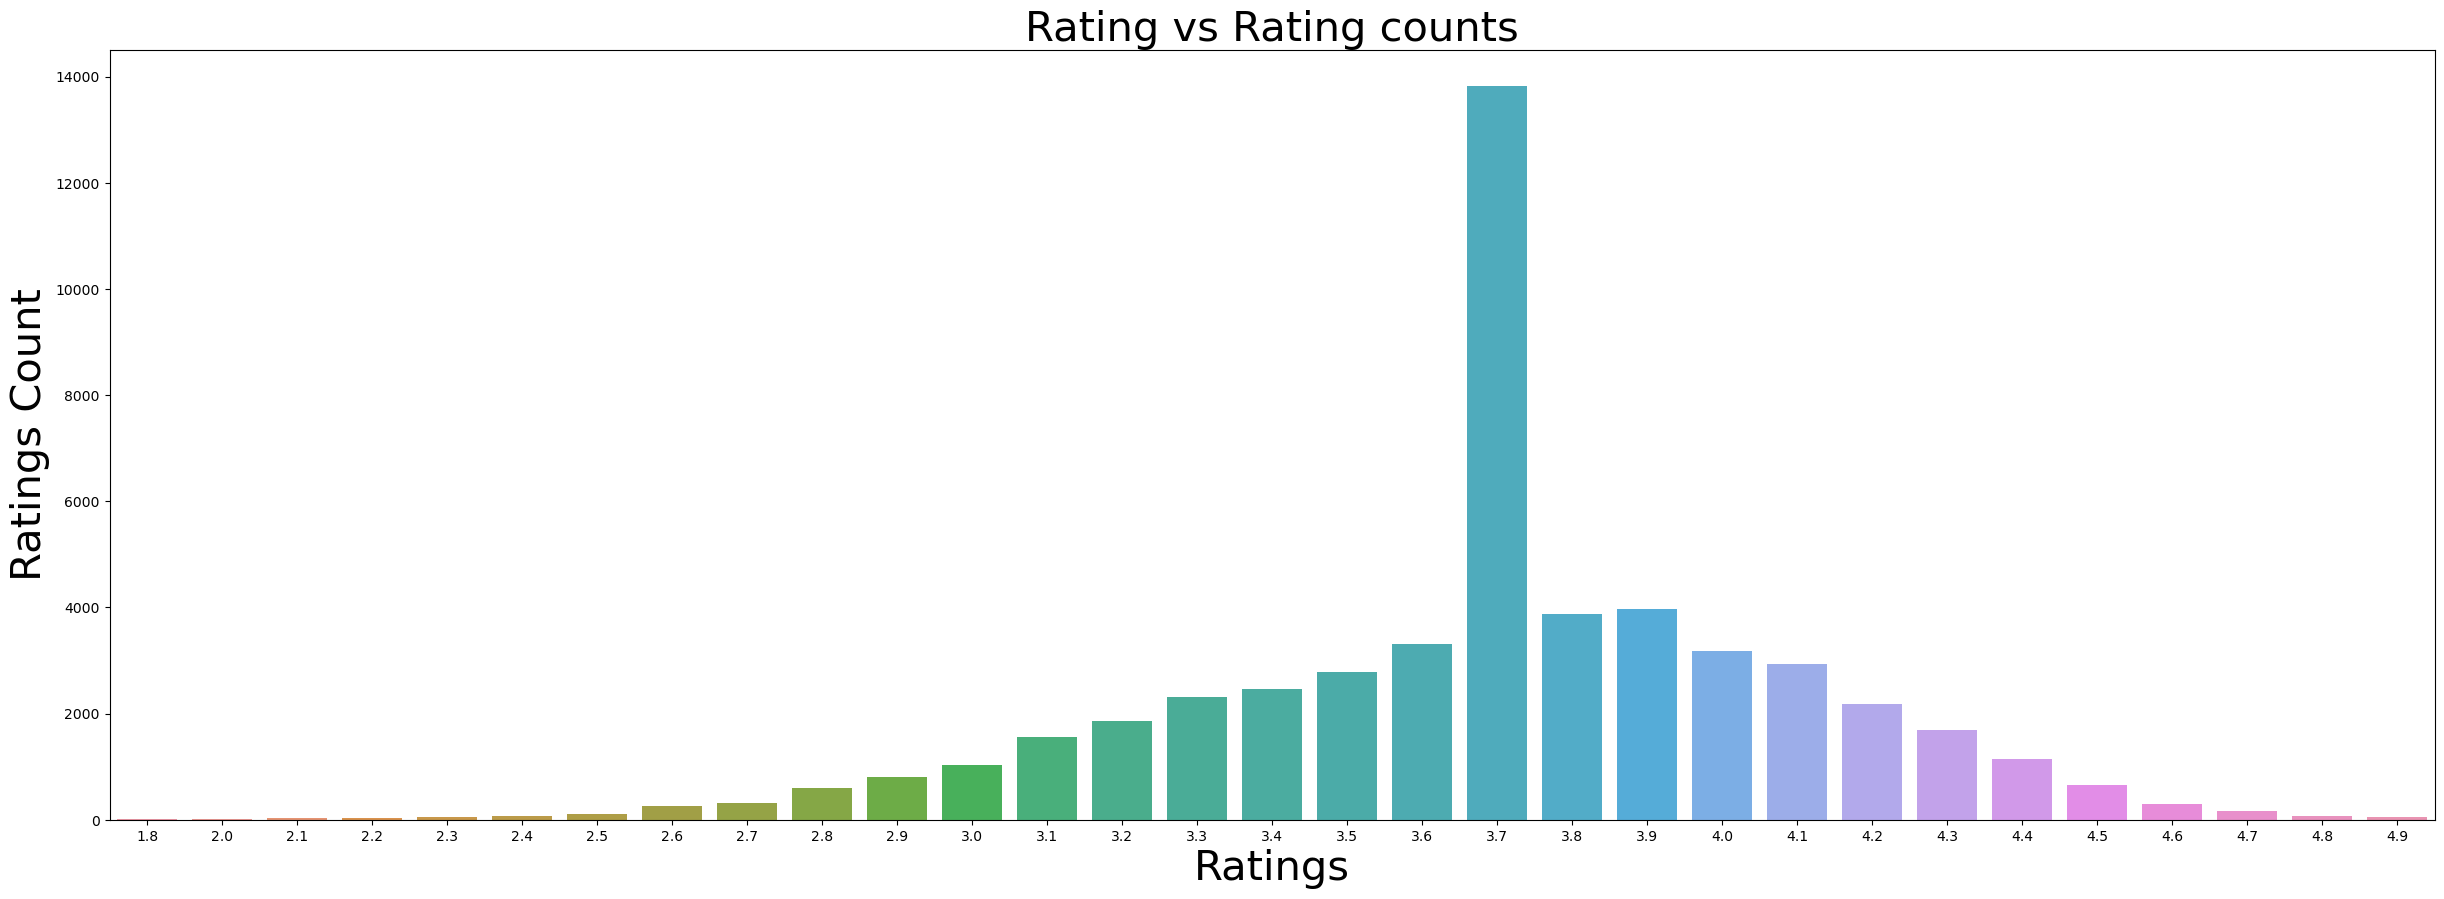

In [223]:
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)


### Most of the restaurants in Bangalore received a rating of 3.7. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.

In [224]:
df.columns

Index(['Name', 'Takes online orders?', 'Has table booking?', 'Ratings',
       'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City',
       'Ratings_null'],
      dtype='object')

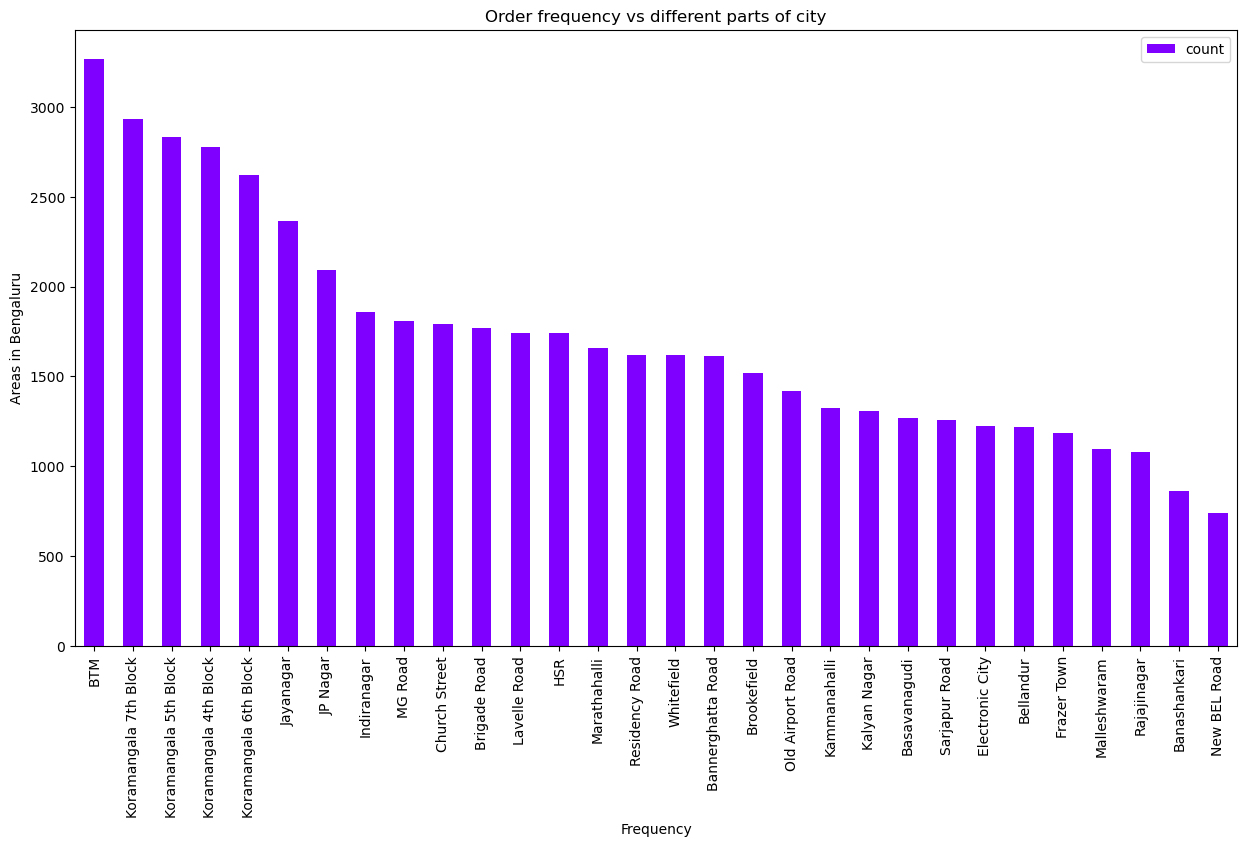

In [225]:
df['City'].value_counts().plot(kind='bar', figsize=(15,8), colormap='rainbow', legend=True, fontsize=10)
plt.title('Order frequency vs different parts of city')
plt.xlabel('Frequency')
plt.ylabel('Areas in Bengaluru')
plt.show()

In [226]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                  2907
North Indian, Chinese                         2381
South Indian                                  1826
Biryani                                        915
Bakery, Desserts                               910
                                              ... 
European, Asian, North Indian                    1
North Indian, Continental, Mughlai, Andhra       1
Fast Food, Ice Cream, Pizza, Desserts            1
Continental, Fast Food, Chinese, Burger          1
North Indian, Chinese, Arabian, Momos            1
Name: count, Length: 2724, dtype: int64

In [227]:
 df['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(30)

North Indian    21041
Chinese         15516
South Indian     8633
Fast Food        8084
Biryani          6473
Continental      5742
Desserts         5605
Cafe             5297
Beverages        4738
Italian          3377
Bakery           2838
Street Food      2593
Pizza            2065
Burger           2003
Seafood          1803
Ice Cream        1767
Andhra           1755
Mughlai          1566
Rolls            1468
American         1459
Kerala           1454
Asian            1289
Momos            1274
Finger Food      1214
Juices           1143
Salad            1132
Arabian          1096
Kebab            1032
Mithai           1027
Thai              998
Name: count, dtype: int64

In [228]:
df['Type'].str.split(', ', expand=True).stack().value_counts().head(50)

Delivery              25857
Dine-out              17756
Desserts               3589
Cafes                  1723
Drinks & nightlife     1094
Buffet                  880
Pubs and bars           694
Name: count, dtype: int64

* ### Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?

[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 3000x1000 with 0 Axes>

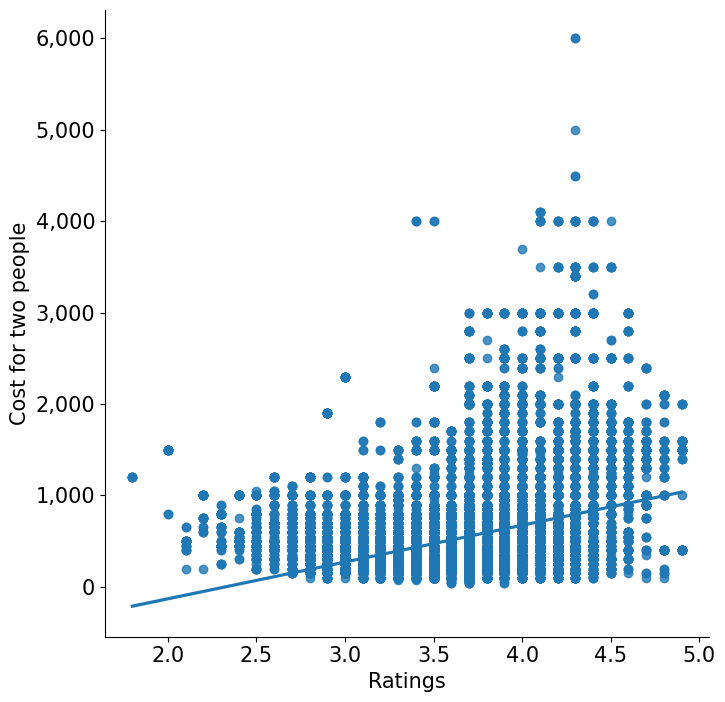

In [229]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


As we can see, restaurants that cost less have better reviews than restaurants that are expensive.

* ### Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.

In [230]:
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

              City   Ratings
7    Church Street  3.786001
21         MG Road  3.785880
5     Brigade Road  3.784502
27  Residency Road  3.767696
20    Lavelle Road  3.763871


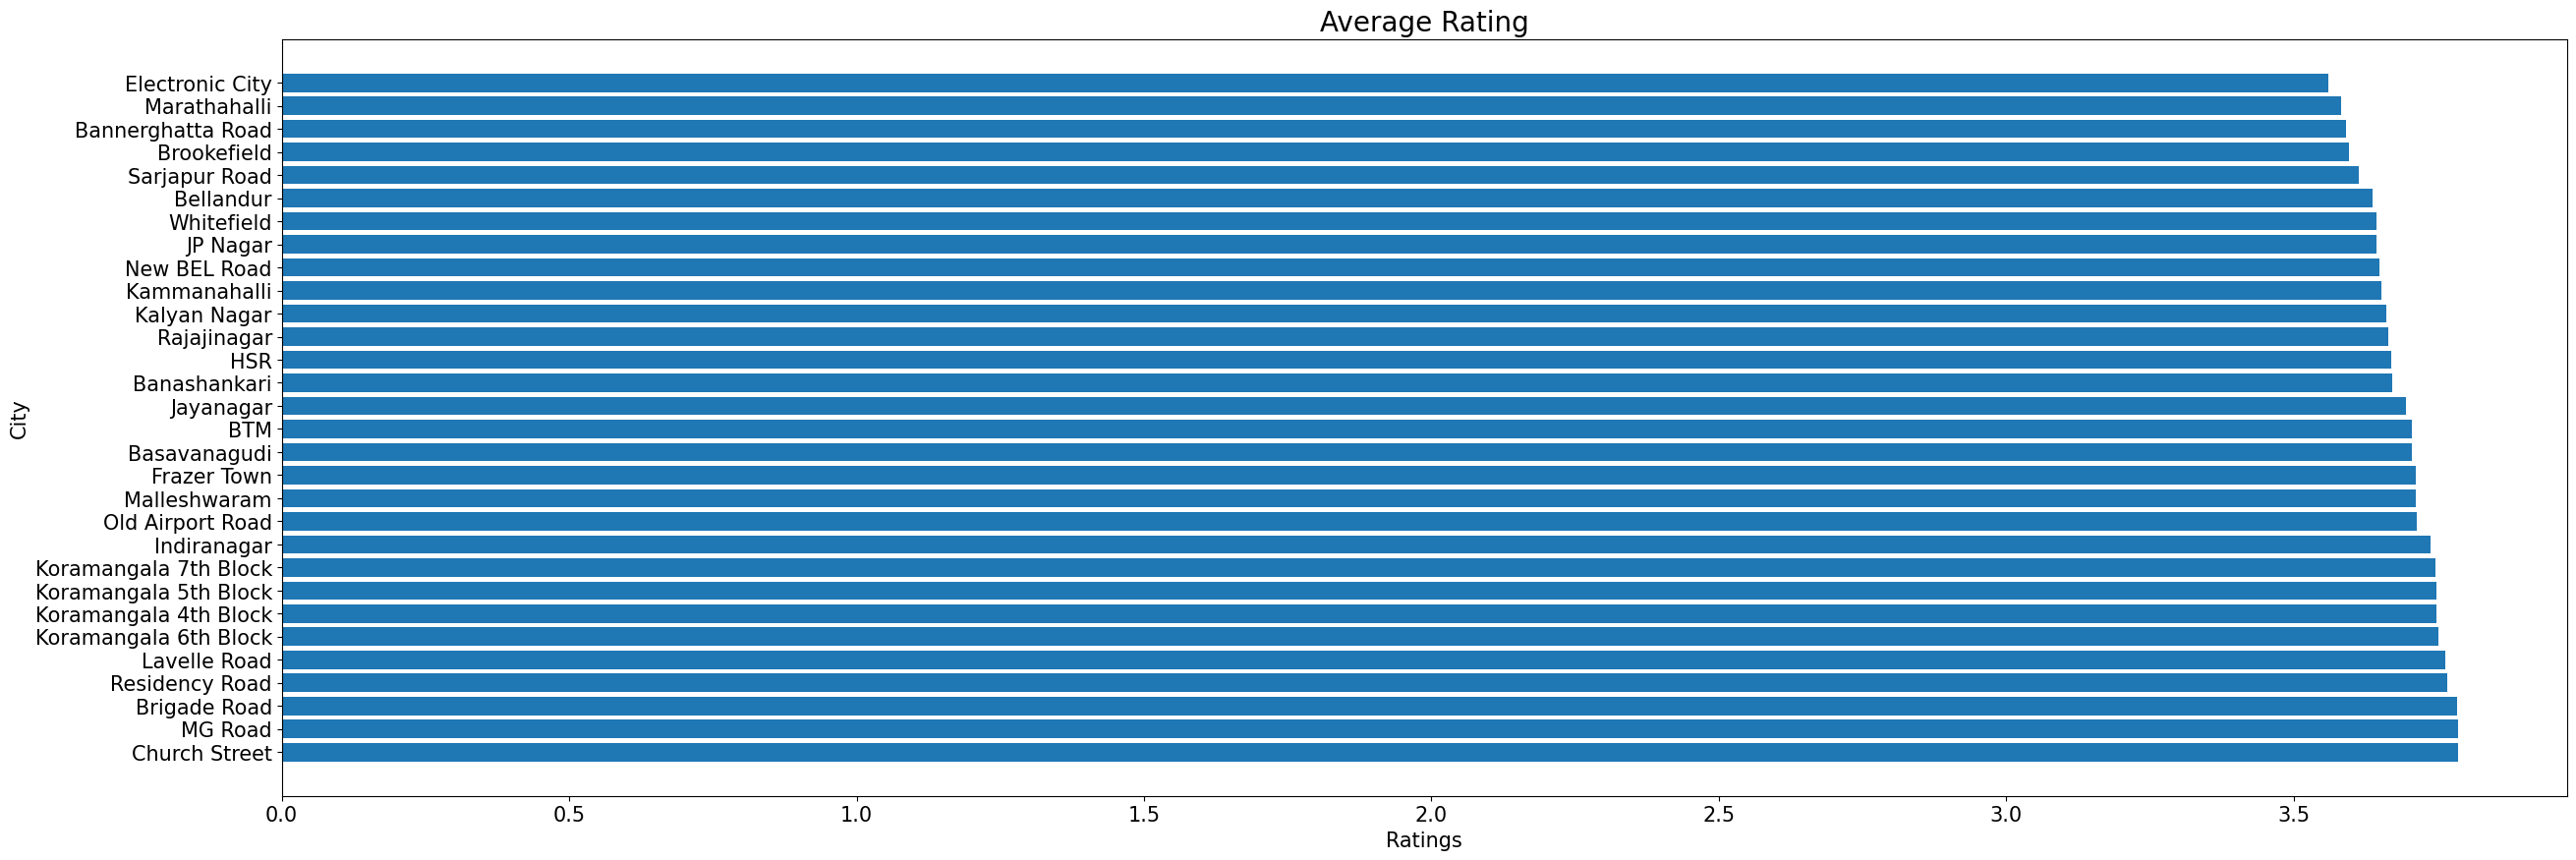

In [231]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()


High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants.

* ### Which cuisine do customers like the most?

In [232]:
b=df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))


                                               Cuisines  Ratings
204                         Asian, Chinese, Thai, Momos      4.9
1469                 Healthy Food, Salad, Mediterranean      4.9
1155  Continental, North Indian, Italian, South Indi...      4.9
2074         North Indian, European, Mediterranean, BBQ      4.8
225             Asian, Mediterranean, North Indian, BBQ      4.8


* ### What is the average price for two people based on the type of service?

                 Type         Cost
3            Desserts   391.758150
2            Delivery   463.477395
4            Dine-out   589.849628
1               Cafes   623.998839
0              Buffet  1293.977273
6       Pubs and bars  1315.561960
5  Drinks & nightlife  1434.506399


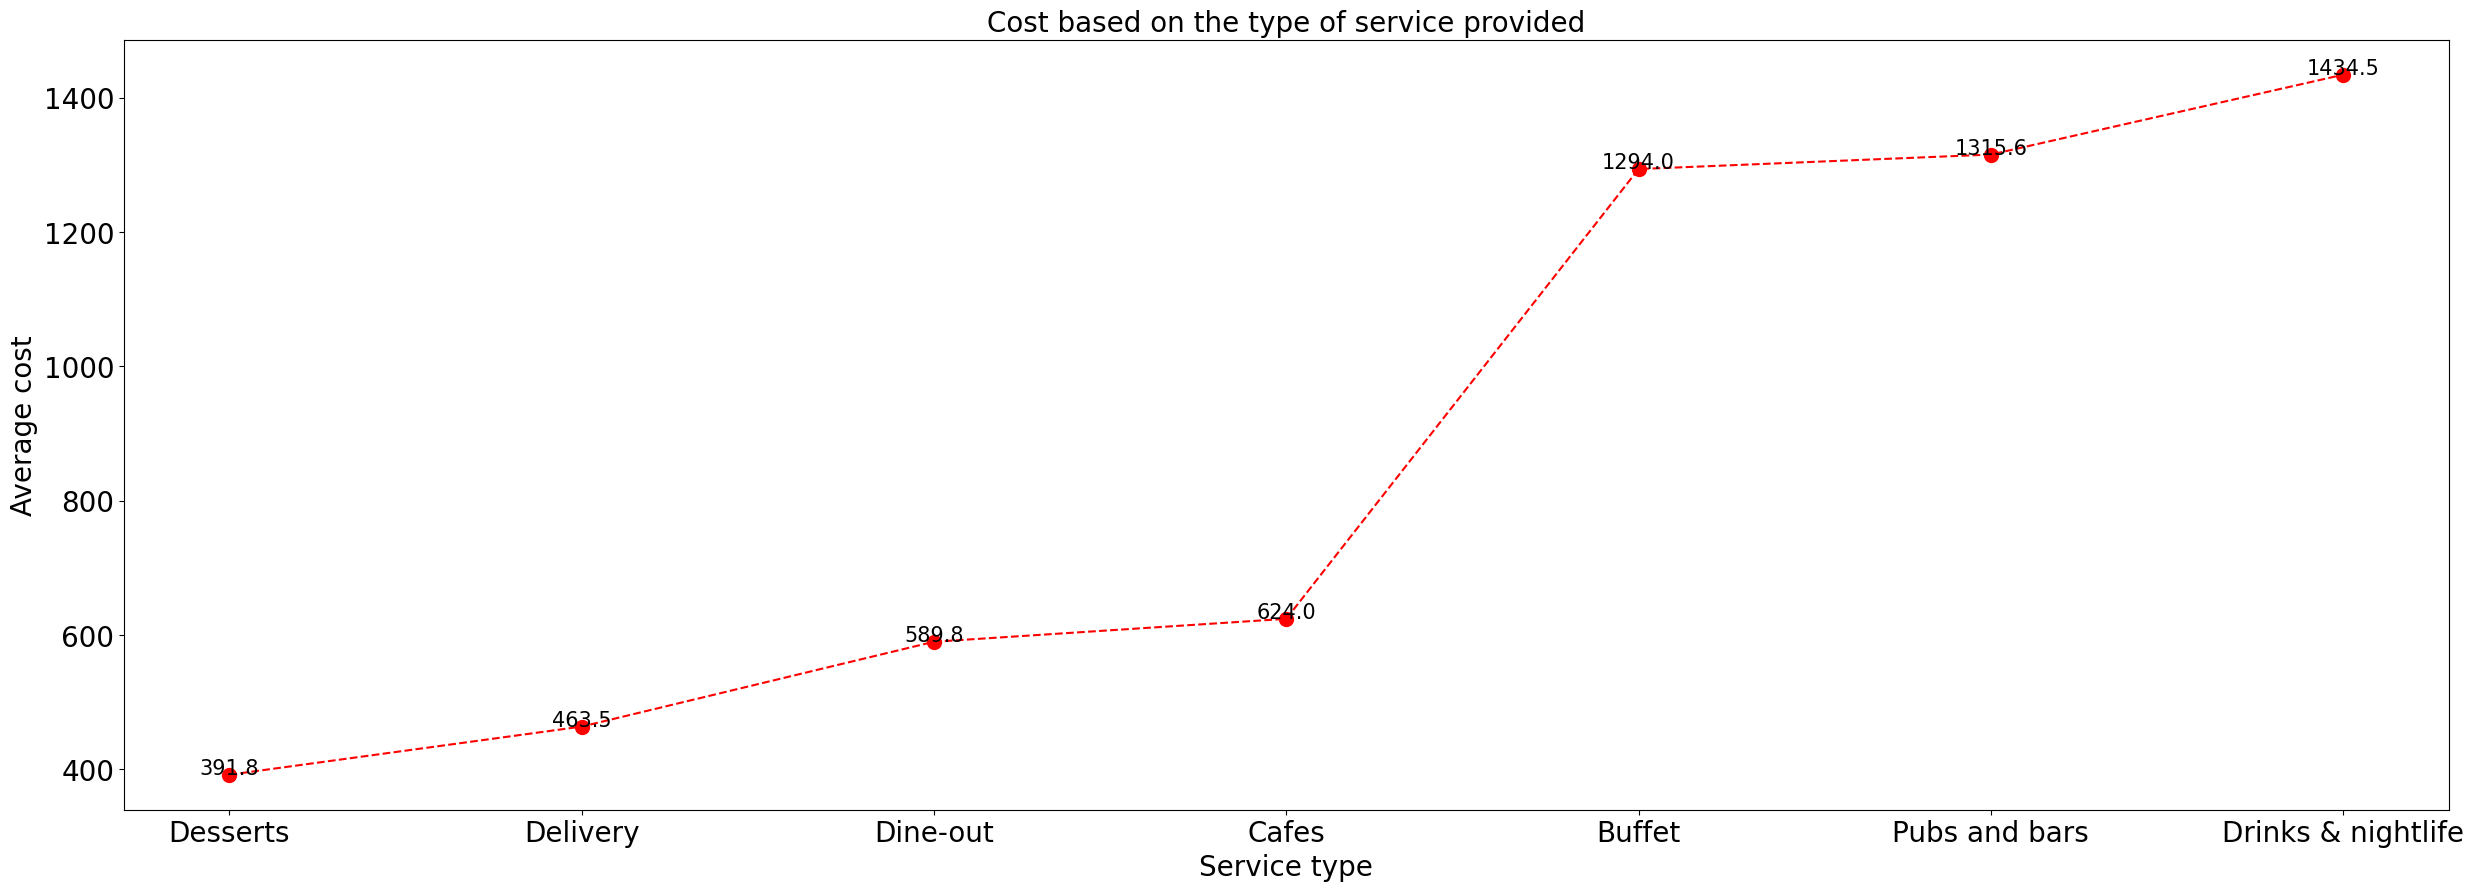

In [233]:
d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

According to the line graph above, while desserts were the least expensive type of food, restaurants that served buffets and drinks cost more than Rs.1300 for two people.

* ### Does the restaurant’s rating depend on whether it accepts online orders or not?

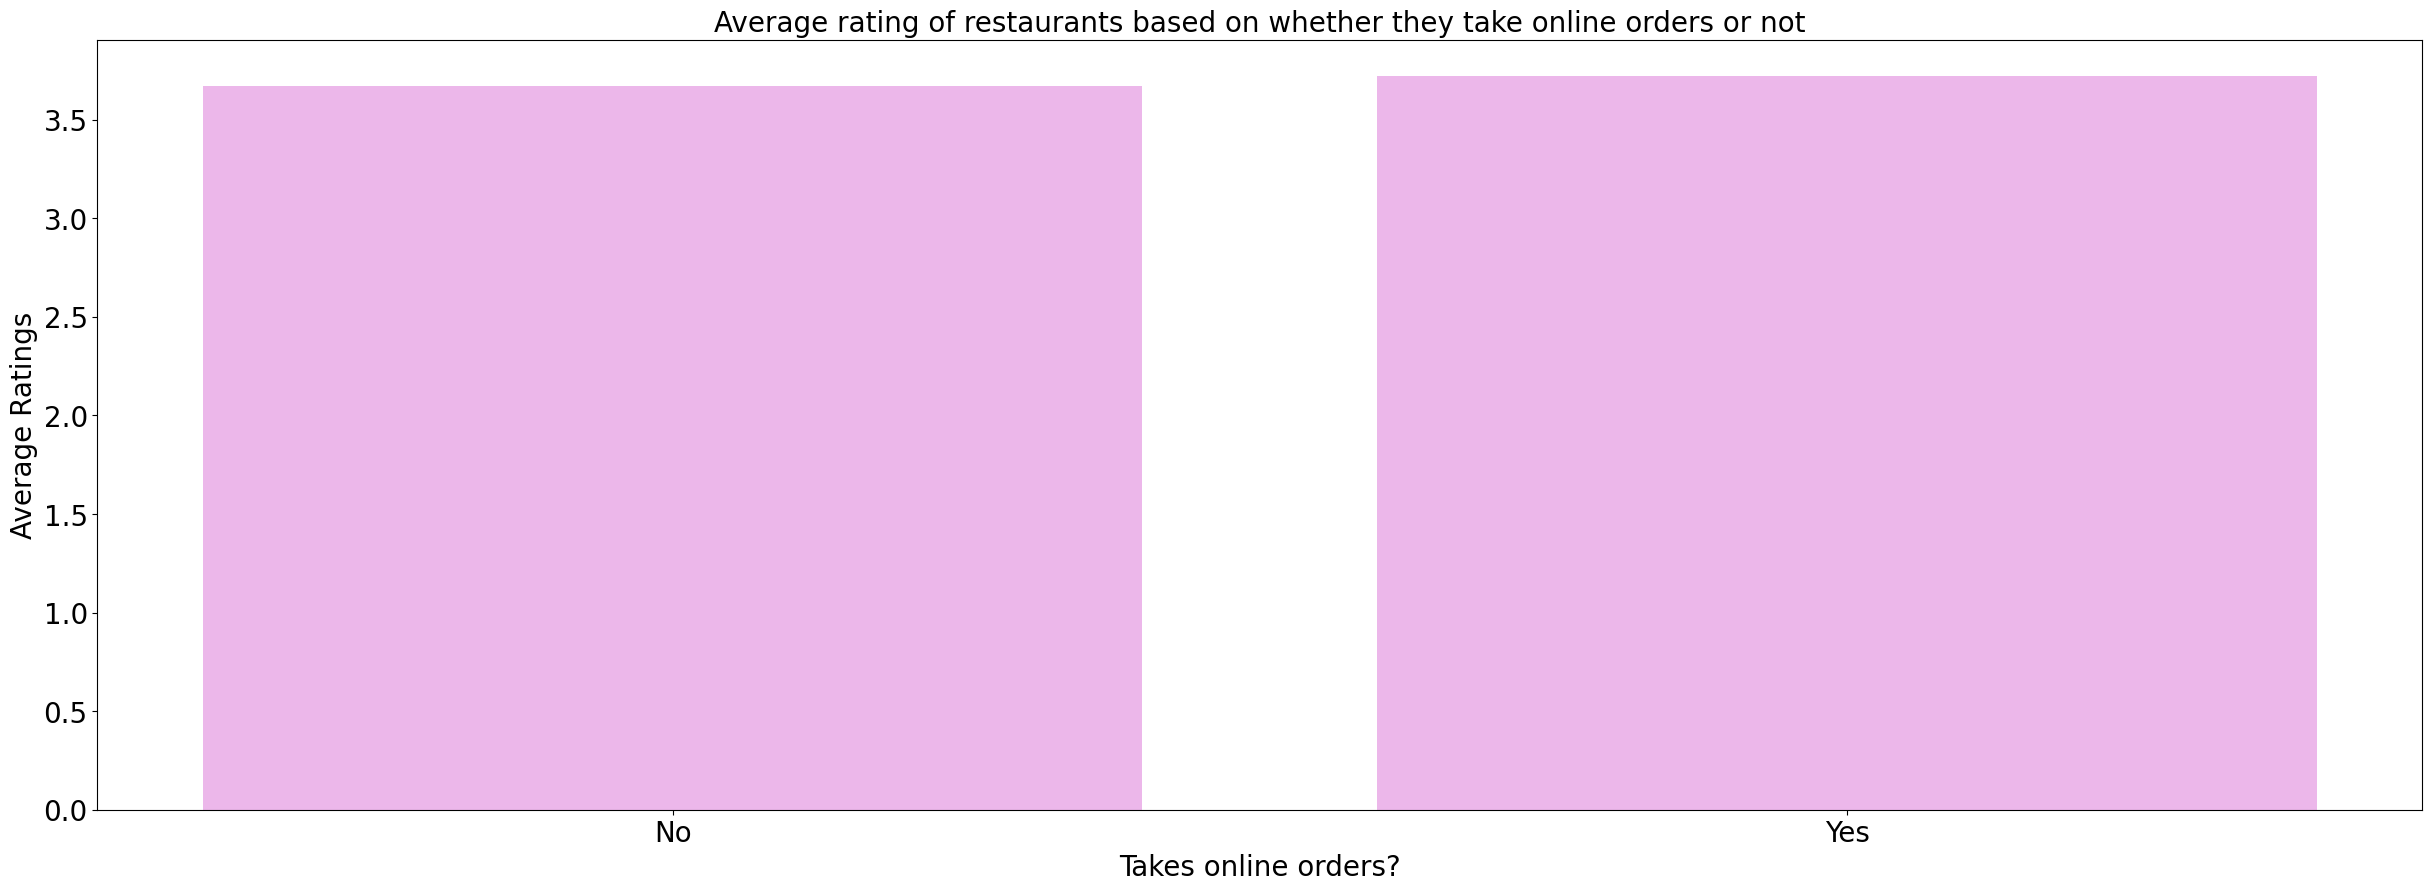

In [234]:
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

In [235]:
df.head()

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City,Ratings_null
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,0
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,0
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,0


* ### What are the top 10 highest-rated restaurants?

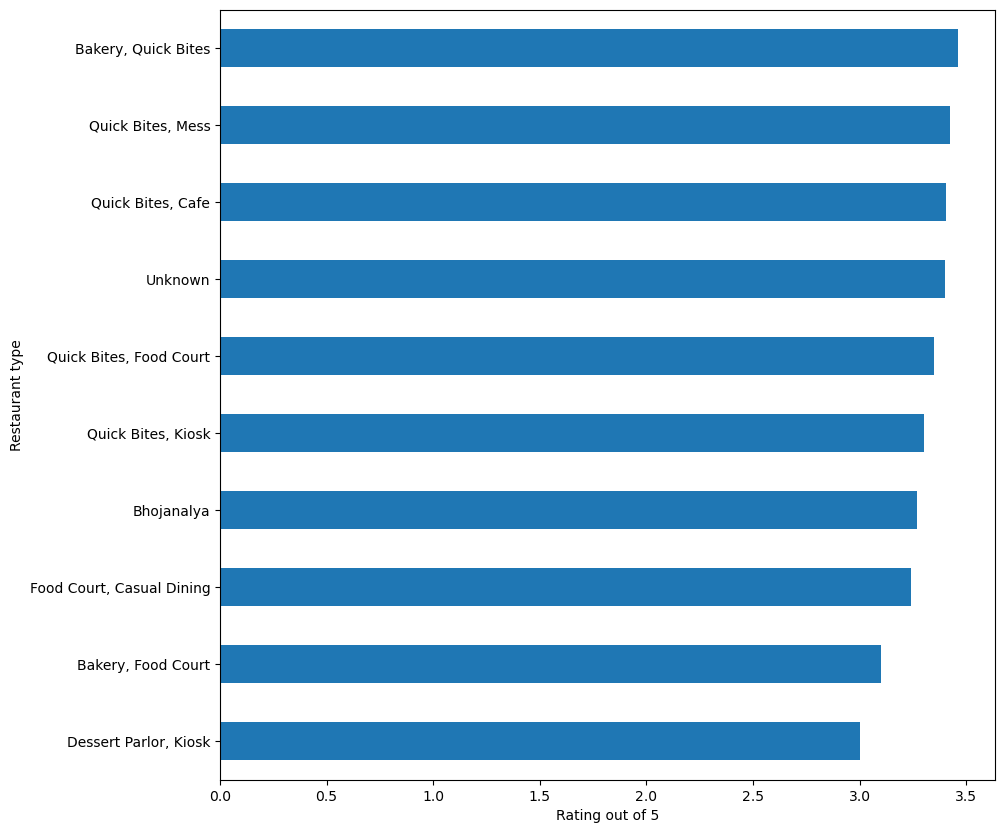

In [237]:
q2=df.groupby('Rest_Type')['Ratings'].mean().sort_values(ascending=True)[0:10]

q2.plot(kind='barh',figsize=(10,10));
plt.ylabel('Restaurant type');
plt.xlabel('Rating out of 5');


Customers tend to rate restaurant that provide delivery solely or along with other restaurant types highly

* ### Is there any linear correlation(where an increase/decrease of a value indicates a change in the value of another proportionally) between any of the numerical columns in this dataset?

In [240]:
dtype_df = df.dtypes
float_cols = dtype_df.iloc[(dtype_df=='float64').values].index
df[float_cols].corr()

,Ratings,Cost
Ratings,1.000000,0.363702
Cost,0.363702,1.000000


* ### Which cities have the highest purchasing power in Bangalore?

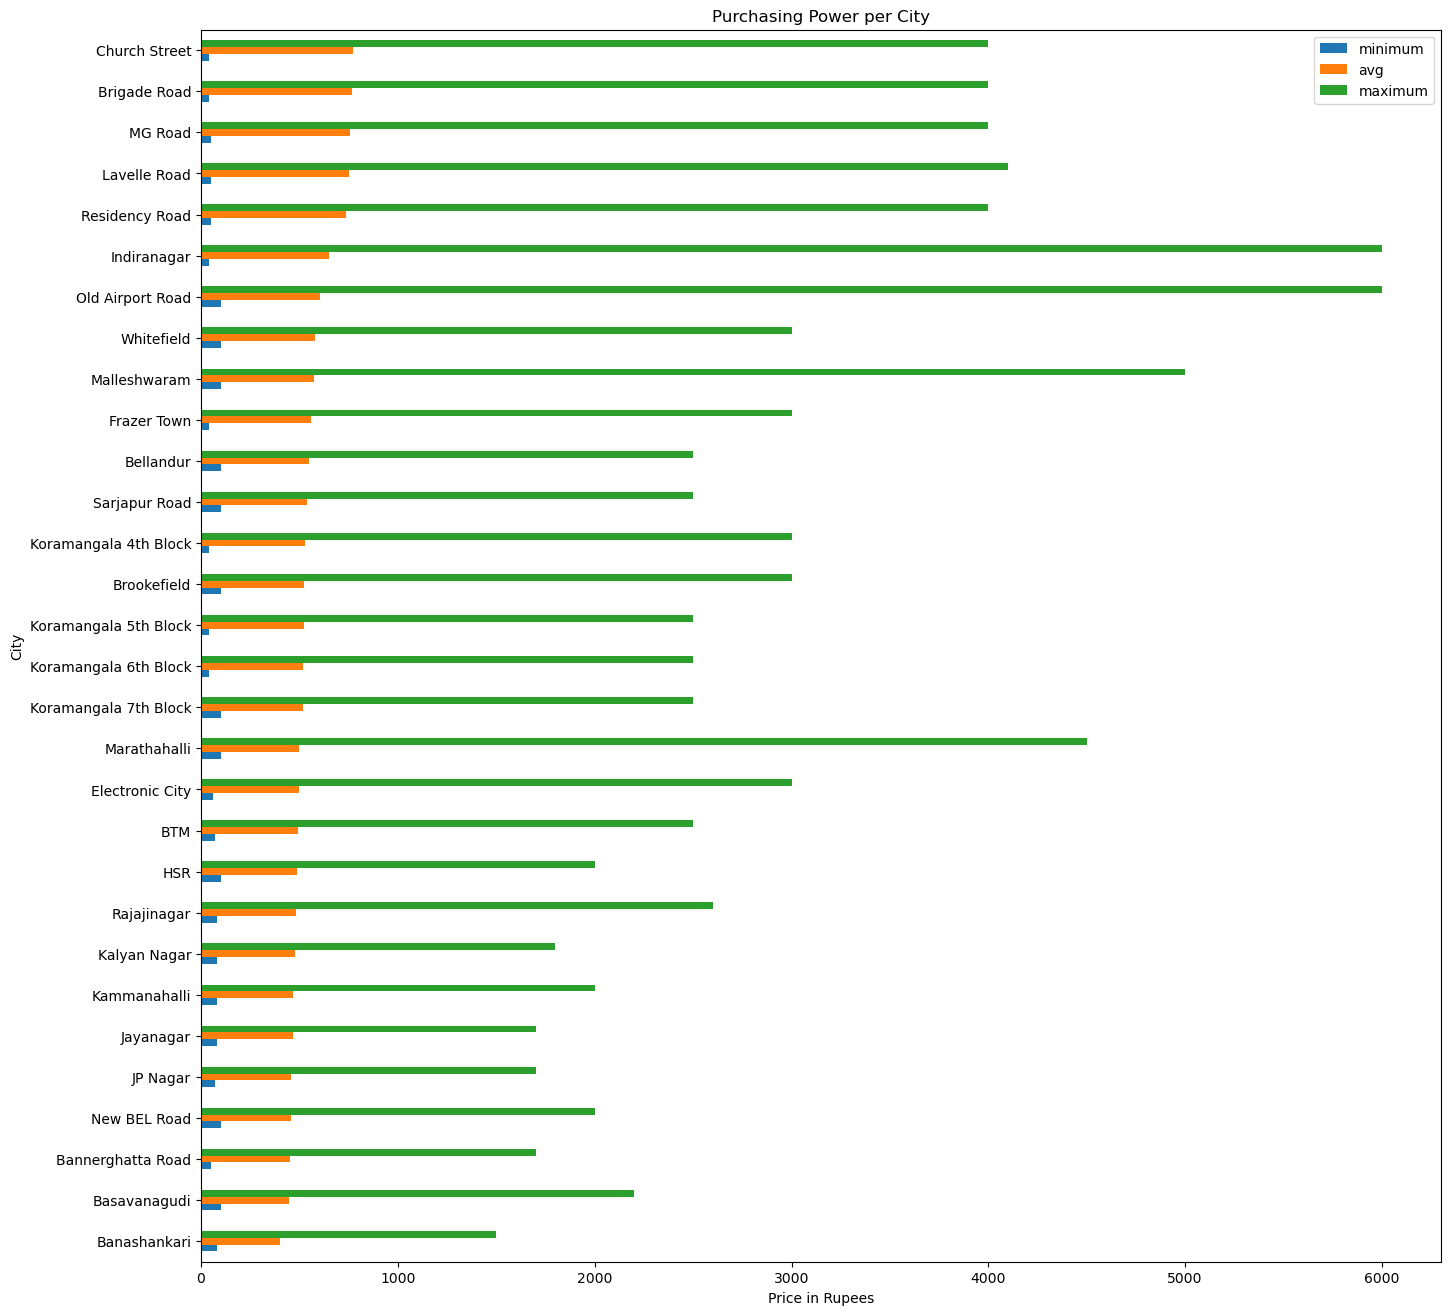

In [242]:
q6=df.groupby('City').agg(minimum=('Cost','min'),avg=('Cost','mean'),maximum=('Cost','max')).sort_values(by='avg')
q6.plot(kind='barh',figsize=(16,16));
plt.title('Purchasing Power per City');
plt.xlabel('Price in Rupees');
plt.ylabel('City');

In [241]:
df.columns

Index(['Name', 'Takes online orders?', 'Has table booking?', 'Ratings',
       'Votes', 'Rest_Type', 'Cuisines', 'Cost', 'Type', 'City',
       'Ratings_null'],
      dtype='object')

Church Street has the highest purchasing power (usually cities with higher percentage of high class citizens), while Banashankari has the lowest purchasing power

### Conclusion from EDA
Here, we performed exploratory data analysis on the Zomato Bangalore Restaurants dataset and looked into the most influencing factors that led to a restaurant’s successful running in the city. The code provided here can be easily understood and used to implement EDA on other similar datasetscretion.

Key Takeaways:
- Restaurant ratings are highly influenced by the restaurant’s cuisine, facilities, and pricing.
  
- The locality where the restaurant is situated also helps in predicting whether the restaurant will run successfully or not.
  
- Places that sell desserts, beverages, and food delivery services tend to be the most popular among the customers.